In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [3]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [41]:
ticker='AAPL'
start=dt.datetime(2010,1,1)
end=dt.datetime(2022,1,1)
train_data=yf.download(ticker,start,end)

[*********************100%%**********************]  1 of 1 completed


In [42]:
train_data.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')

In [43]:
df=df.reset_index()['Close']

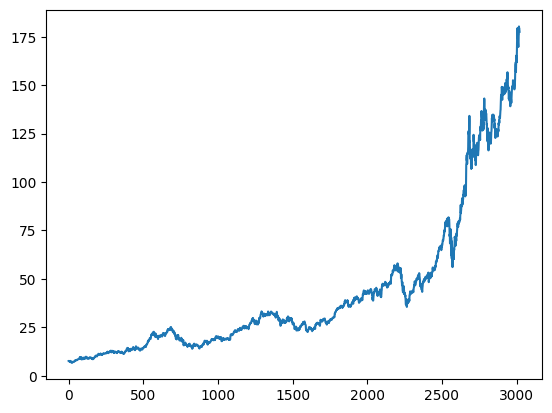

In [44]:
plt.plot(df)

In [45]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [46]:
training_size=int(len(df)*0.7)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [47]:
training_size,test_size

(2114, 907)

In [48]:
def create_dataset(dataset, time_step=1):
  data_X, data_Y=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    data_X.append(a)
    data_Y.append(dataset[i+time_step,0])
  return np.array(data_X), np.array(data_Y)

In [49]:
time_step=60
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(2053, 60)
(2053,)
(846, 60)
(846,)


(None, None)

In [50]:
#reshape the inputs to be of the form [samples, time_steps,features]
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [51]:
model=Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,451 (591.61 KB)

 Trainable params: 151,451 (591.61 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64, verbose=1)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0187e-04 - val_loss: 0.0018
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.4315e-04 - val_loss: 8.6131e-04
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2249e-04 - val_loss: 7.7474e-04
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1881e-04 - val_loss: 0.0011
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2253e-04 - val_loss: 7.1707e-04
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2746e-04 - val_loss: 0.0011
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1705e-04 - val_loss: 0.0020
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1348e-04 - val_loss: 0.0012
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.5291e-05 - val_loss: 7.3229e-04
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.8146e-05 - val_loss: 6.3611e-04
Epo

In [55]:
model.save('my_model.keras')

In [57]:
saved_model=tf.keras.models.load_model('my_model.keras')


In [58]:
train_predict=saved_model.predict(X_train)
test_predict=saved_model.predict(X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [59]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [60]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.744557714906534

In [61]:
math.sqrt(mean_squared_error(y_test,test_predict))

99.28816735913503

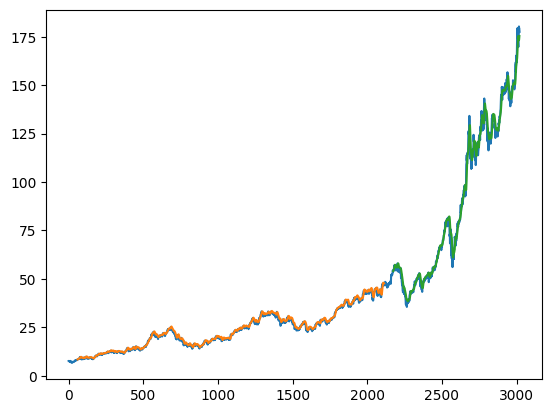

In [62]:
look_back=60
train_Predict_Plot=np.empty_like(df)
train_Predict_Plot[:,:]=np.nan
train_Predict_Plot[look_back:len(train_predict)+look_back,:]=train_predict
test_Predict_Plot=np.empty_like(df)
test_Predict_Plot[:,:]=np.nan
test_Predict_Plot[len(train_predict)+(look_back*2)+1:len(df)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df))
plt.plot(train_Predict_Plot)
plt.plot(test_Predict_Plot)
plt.show()

In [63]:
len(test_data)

907

In [64]:
X_input=test_data[(len(test_data)-60):].reshape(1,-1)
X_input.shape
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [82]:
from numpy import array

output_list=[]
n_steps=60
i=0

while(i<60):

  if(len(temp_input)>60):
    X_input=np.array(temp_input[1:])
    X_input=X_input.reshape(1,-1)
    X_input=X_input.reshape((1,n_steps,1))
    y_pred=saved_model.predict(X_input, verbose=0)
    temp_input.extend(y_pred[0].tolist())
    temp_input=temp_input[1:]
    output_list.extend(y_pred.tolist())
    i=i+1
  else:
    X_input=X_input.reshape((1,n_steps,1))
    y_pred=saved_model.predict(X_input, verbose=0)
    temp_input.extend(y_pred[0].tolist())
    output_list.extend(y_pred.tolist())
    i=i+1

In [83]:
day_new=np.arange(1,61)
day_pred=np.arange(61,121)

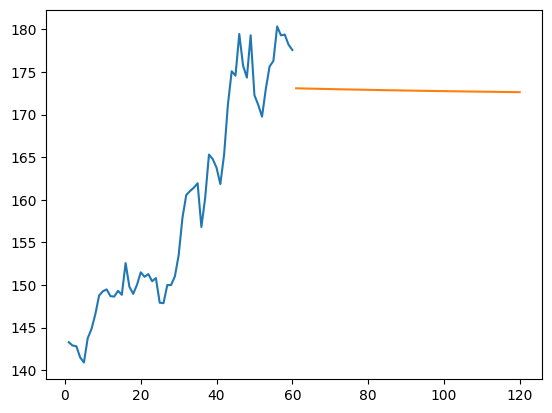

In [84]:
plt.plot(day_new,scaler.inverse_transform(df[len(df)-60:]))
plt.plot(day_pred,scaler.inverse_transform(output_list))

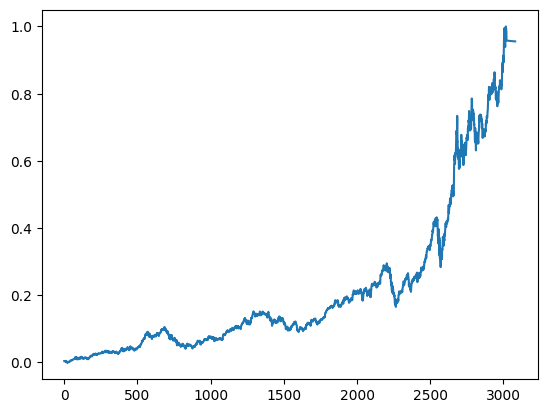

In [85]:
df_ext=df.tolist()
df_ext.extend(output_list)
plt.plot(df_ext[:])

In [86]:
df_ext=scaler.inverse_transform(df_ext).tolist()

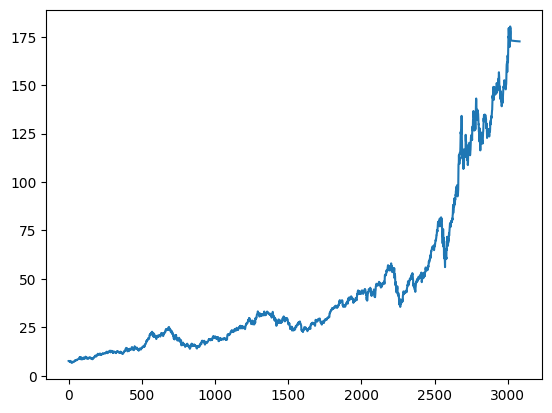

In [87]:
plt.plot(df_ext)

Price Prediction Completed